Base data directory for JSONs: C:/Users/20243898/Downloads/convo_all_airlines
Output plots to: C:\Users\20243898\Downloads\airline_responsiveness_comparison_plots_final_v2

Processing airline: KLM
  Replied count: 1034038
  Not Replied count: 8794315

Processing airline: AirFrance
  Replied count: 760400
  Not Replied count: 4714561

Processing airline: British_Airways
  Replied count: 9927941
  Not Replied count: 16585212

Processing airline: American_Air
  Replied count: 14313425
  Not Replied count: 23473721

Processing airline: Lufthansa
  Replied count: 1535926
  Not Replied count: 5746024

--- Aggregated Data by Airline (Counts) ---


,airline_name,Participated_Count,Did_Not_Participate_Count,Total_Relevant_Tweets
0,KLM,1034038,8794315,9828353
1,AirFrance,760400,4714561,5474961
2,British_Airways,9927941,16585212,26513153
3,American_Air,14313425,23473721,37787146
4,Lufthansa,1535926,5746024,7281950



--- Data Prepared for Plotting (Percentages) ---


,Did Not Participate (%),Participated (%)
airline_name,,
KLM,89.5,10.5
AirFrance,86.1,13.9
British_Airways,62.6,37.4
American_Air,62.1,37.9
Lufthansa,78.9,21.1


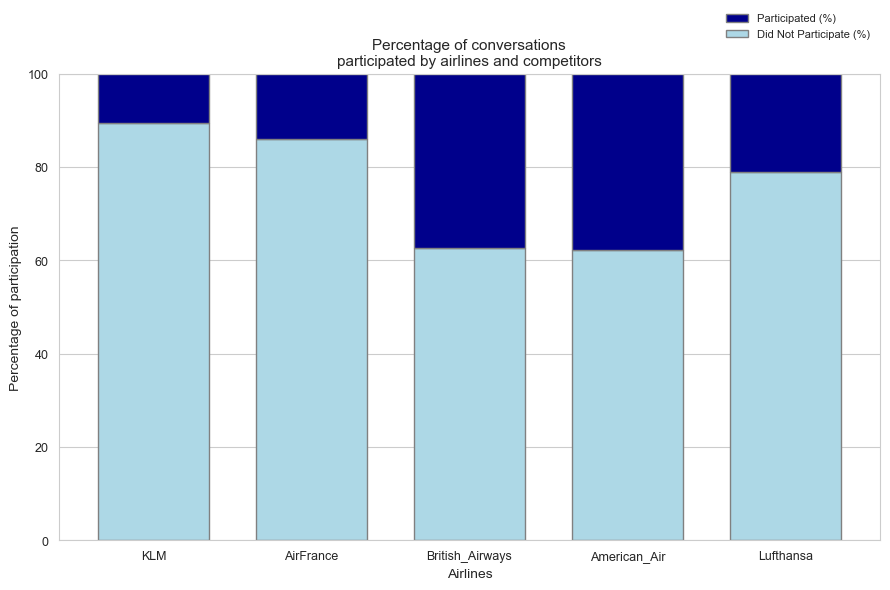


--- Airline Responsiveness Comparison Complete ---


In [2]:

# # Airline Responsiveness Comparison (Replied vs. Not Replied Proportions)
# # Loads data from separate JSON Lines files for each airline's replied/not-replied tweets,
# # calculates proportions, and generates a stacked bar chart.

import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import numpy as np


# Path to the FOLDER where all our individual airline JSON files are located.
BASE_DATA_DIR = r"C:/Users/20243898/Downloads/convo_all_airlines" 

AIRLINE_FILES_CONFIG = {
    'KLM': {
        'replied_file': 'conversations_with_KLM.json', 
        'not_replied_file': 'conversations_without_KLM_reply.json'
    },
    'AirFrance': {
        'replied_file': 'conversations_with_AirFrance.json',
        'not_replied_file': 'conversations_without_airfrance_reply.json'
    },
    'British_Airways': {
        'replied_file': 'conversations_with_british_airlines.json',
        'not_replied_file': 'conversations_without_british_reply.json'
    },
    'American_Air': { 
        'replied_file': 'conversations_with_american_air.json',
        'not_replied_file': 'conversations_without_american_reply.json'
    },
    'Lufthansa': {
        'replied_file': 'conversations_with_lufthansa (1).json', 
        'not_replied_file': 'conversations_without_lufthansa_reply (1).json' 
    }
}

airlines_to_plot = ['KLM', 'AirFrance', 'British_Airways', 'American_Air', 'Lufthansa']


PLOTS_OUTPUT_DIR = os.path.join(os.path.expanduser('~'), 'Downloads', 'airline_responsiveness_comparison_plots_final_v2') # v2
os.makedirs(PLOTS_OUTPUT_DIR, exist_ok=True)
print(f"Base data directory for JSONs: {BASE_DATA_DIR}")
print(f"Output plots to: {PLOTS_OUTPUT_DIR}")

sns.set_style("whitegrid")
pd.options.display.max_columns = 60
pd.options.display.float_format = '{:.1f}'.format

#1. Function to Load and Count Tweets from a JSON file
def count_tweets_in_jsonl(file_path):
    """Counts the number of lines (tweets) in a JSON Lines file."""
    if not os.path.exists(file_path):
        print(f"Warning: File not found - {file_path}")
        return 0
    count = 0
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            for _ in f:
                count += 1
        return count
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return 0

#2. Load Data and Aggregate Counts per Airline
airline_summary_data = []

for airline_name in airlines_to_plot:
    if airline_name not in AIRLINE_FILES_CONFIG:
        print(f"Warning: Configuration for '{airline_name}' not found in AIRLINE_FILES_CONFIG. Skipping.")
        airline_summary_data.append({'airline_name': airline_name, 'Participated_Count': 0, 'Did_Not_Participate_Count': 0, 'Total_Relevant_Tweets': 0})
        continue

    files_config = AIRLINE_FILES_CONFIG[airline_name]
    print(f"\nProcessing airline: {airline_name}")

    replied_file_path = os.path.join(BASE_DATA_DIR, files_config['replied_file'])
    not_replied_file_path = os.path.join(BASE_DATA_DIR, files_config['not_replied_file'])

    replied_count = count_tweets_in_jsonl(replied_file_path)
    not_replied_count = count_tweets_in_jsonl(not_replied_file_path)

    print(f"  Replied count: {replied_count}")
    print(f"  Not Replied count: {not_replied_count}")

    total_relevant_tweets = replied_count + not_replied_count

    airline_summary_data.append({
        'airline_name': airline_name,
        'Participated_Count': replied_count,
        'Did_Not_Participate_Count': not_replied_count,
        'Total_Relevant_Tweets': total_relevant_tweets
    })

df_airline_summary = pd.DataFrame(airline_summary_data)

if df_airline_summary.empty or df_airline_summary['Total_Relevant_Tweets'].sum() == 0 :
    print("\nERROR: No data loaded or all counts are zero. Cannot create plot. Please check paths and file contents.")
else:
    print("\n--- Aggregated Data by Airline (Counts) ---")
    display(df_airline_summary)

    #3. Calculate Percentages for Stacked Bar Chart 
    df_airline_summary['Participated (%)'] = df_airline_summary.apply(
        lambda row: (row['Participated_Count'] / row['Total_Relevant_Tweets'] * 100) if row['Total_Relevant_Tweets'] > 0 else 0, axis=1
    )
    df_airline_summary['Did Not Participate (%)'] = df_airline_summary.apply(
        lambda row: (row['Did_Not_Participate_Count'] / row['Total_Relevant_Tweets'] * 100) if row['Total_Relevant_Tweets'] > 0 else 0, axis=1
    )

    df_plot_perc = df_airline_summary.set_index('airline_name')[['Did Not Participate (%)', 'Participated (%)']]
    df_plot_perc = df_plot_perc.reindex(airlines_to_plot).dropna(how='all')

    print("\n--- Data Prepared for Plotting (Percentages) ---")
    display(df_plot_perc)

    #4. Create Stacked Bar Chart 
    if not df_plot_perc.empty:
        fig, ax = plt.subplots(figsize=(9, 6))
        df_plot_perc.plot(kind='bar', stacked=True, ax=ax, color=['lightblue', 'darkblue'], edgecolor='grey', width=0.7)

        ax.set_title('Percentage of conversations\nparticipated by airlines and competitors', fontsize=11)
        ax.set_ylabel('Percentage of participation', fontsize=10)
        ax.set_xlabel('Airlines', fontsize=10)
        ax.tick_params(axis='x', rotation=0, labelsize=9)
        ax.tick_params(axis='y', labelsize=9)
        ax.set_yticks(np.arange(0, 101, 20))
        ax.set_ylim(0, 100)
        ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))

        handles, labels = ax.get_legend_handles_labels()
        ax.legend(reversed(handles), reversed(labels), title=None, loc='upper right', frameon=False, fontsize=8, bbox_to_anchor=(1.0, 1.15) )


        plt.tight_layout()
        plt.savefig(os.path.join(PLOTS_OUTPUT_DIR, 'airline_responsiveness_stacked_percentage_from_config.png'))
        plt.show()
    else:
        print("No data to plot after calculating percentages or reindexing.")

print("\n--- Airline Responsiveness Comparison Complete ---")